In [1]:
import os
HOME = os.getcwd()

print(HOME)

/home/abdulla.almarzooqi/Desktop/AI702Project


In [2]:
# Adjust paths as required

dataset_path = '/Drowsiness-/-Fatigue_Detection-4'

original_yaml_file = f'{HOME}{dataset_path}/data.yaml'
new_yaml_file = f'{HOME}/custom_data.yaml'

test_images_path =  f'{HOME}{dataset_path}/test/images'
train_images_path = f'{HOME}{dataset_path}/train/images'
val_images_path = f'{HOME}{dataset_path}/valid/images'

In [13]:
import yaml

# Load the original YAML file
with open(original_yaml_file, 'r') as file:
    data = yaml.safe_load(file)

# Update the paths in the loaded data
data['test'] = test_images_path
data['val'] = val_images_path
data['train'] = train_images_path

# Save the modified data to a new YAML file
with open(new_yaml_file, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

Navigate to the created custom YAML file, and change the class names as follows:
- 0: alert
- 1: drowsy

So that you get the class names instead of just numbers.

In [3]:
import ultralytics
ultralytics.checks() # Check if everything is working properly

from ultralytics import YOLO

/home/abdulla.almarzooqi/miniconda3/envs/DD/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
os.environ['WANDB_DISABLED'] = 'true'

In [16]:
model_path: str = f'{HOME}/yolov8m.pt'

model = YOLO(model_path)

# Set hyperparameters and train the model
results = model.train(
    data=new_yaml_file,
    conf=0.25,
    iou=0.45,
    epochs=30,
    batch=32,
    imgsz=480, 
    optimizer='Adam',
    lrf=0.0001,
    lr0=0.01,
    save=True,
    momentum=0.8,
    amp=False
)

New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=/home/abdulla.almarzooqi/Desktop/AI702Project/yolov8m.pt, data=/home/abdulla.almarzooqi/Desktop/AI702Project/custom_data.yaml, epochs=30, time=None, patience=50, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=N

train: Scanning /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/train/labels.cache... 9638 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9638/9638 [00:00<?, ?it/s]
val: Scanning /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/valid/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.8) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      14.7G      1.827      2.213      1.988         11        480: 100%|██████████| 302/302 [02:22<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]


                   all        814        814     0.0129     0.0192    0.00595   0.000738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30        15G      1.708      2.004      1.867         10        480: 100%|██████████| 302/302 [01:14<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.70it/s]

                   all        814        814      0.362      0.388      0.342      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30        15G       1.61       1.85      1.785         16        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.92it/s]

                   all        814        814      0.479      0.487      0.423      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30        15G       1.56      1.779      1.748         18        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.90it/s]

                   all        814        814      0.438      0.484      0.438      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        15G      1.511      1.698      1.709         13        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.78it/s]

                   all        814        814      0.483      0.598      0.538      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30        15G      1.457      1.624      1.669         16        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        814        814      0.614      0.788      0.717      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30        15G      1.434       1.59      1.657         13        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]

                   all        814        814      0.607      0.839      0.708      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30        15G      1.408      1.556      1.638         18        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.29it/s]

                   all        814        814      0.631      0.221      0.425      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30        15G      1.377      1.492      1.615         11        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814      0.759      0.708      0.778      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30        15G      1.355      1.451      1.601         17        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.70it/s]

                   all        814        814      0.693      0.663      0.756      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30        15G      1.335      1.402      1.583         13        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        814        814      0.823      0.844       0.87       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30        15G      1.317      1.366      1.563         13        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814       0.87       0.77      0.878      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30        15G      1.296      1.327       1.55          8        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814      0.871      0.814      0.917       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30        15G      1.273      1.285      1.528         16        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]

                   all        814        814      0.945      0.935      0.966      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30        15G      1.259      1.257      1.519         15        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814      0.922      0.911       0.95      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30        15G      1.244      1.228      1.497         10        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]

                   all        814        814      0.861      0.875      0.924      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30        15G      1.232      1.211      1.486         13        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.62it/s]

                   all        814        814      0.928      0.931      0.945      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30        15G      1.205      1.169      1.465         10        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]

                   all        814        814      0.934      0.938      0.949       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30        15G      1.189      1.152      1.451         16        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]

                   all        814        814       0.88      0.943      0.956      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30        15G      1.173      1.129      1.443         12        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814      0.906      0.903      0.934      0.547


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30        15G      1.042     0.7568      1.421          6        480: 100%|██████████| 302/302 [01:14<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814      0.933      0.916      0.967      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30        15G      1.006       0.71      1.388          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        814        814      0.949      0.955      0.975      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30        15G     0.9745     0.6774      1.356          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.64it/s]

                   all        814        814      0.924      0.958      0.962      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30        15G      0.944     0.6572      1.328          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.63it/s]

                   all        814        814      0.951      0.957      0.966      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30        15G     0.9194     0.6222      1.306          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]

                   all        814        814       0.95      0.962       0.97      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30        15G     0.8935     0.6006      1.286          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814      0.957       0.97      0.966      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30        15G     0.8757      0.577      1.271          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]

                   all        814        814      0.943      0.965      0.959      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30        15G     0.8503     0.5481      1.253          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.65it/s]

                   all        814        814      0.956      0.977      0.978      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30        15G     0.8278     0.5298      1.228          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.55it/s]

                   all        814        814      0.961      0.976      0.975      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30        15G     0.8048     0.5042      1.209          6        480: 100%|██████████| 302/302 [01:12<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.67it/s]

                   all        814        814       0.97      0.975      0.976      0.746



30 epochs completed in 0.690 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 52.0MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]


                   all        814        814      0.956      0.977      0.978      0.758
                 alert        814        234      0.927      0.975      0.968      0.745
                drowsy        814        580      0.984      0.979      0.988       0.77
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train7


/home/abdulla.almarzooqi/Desktop/AI702Project


/home/abdulla.almarzooqi/miniconda3/envs/DD/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


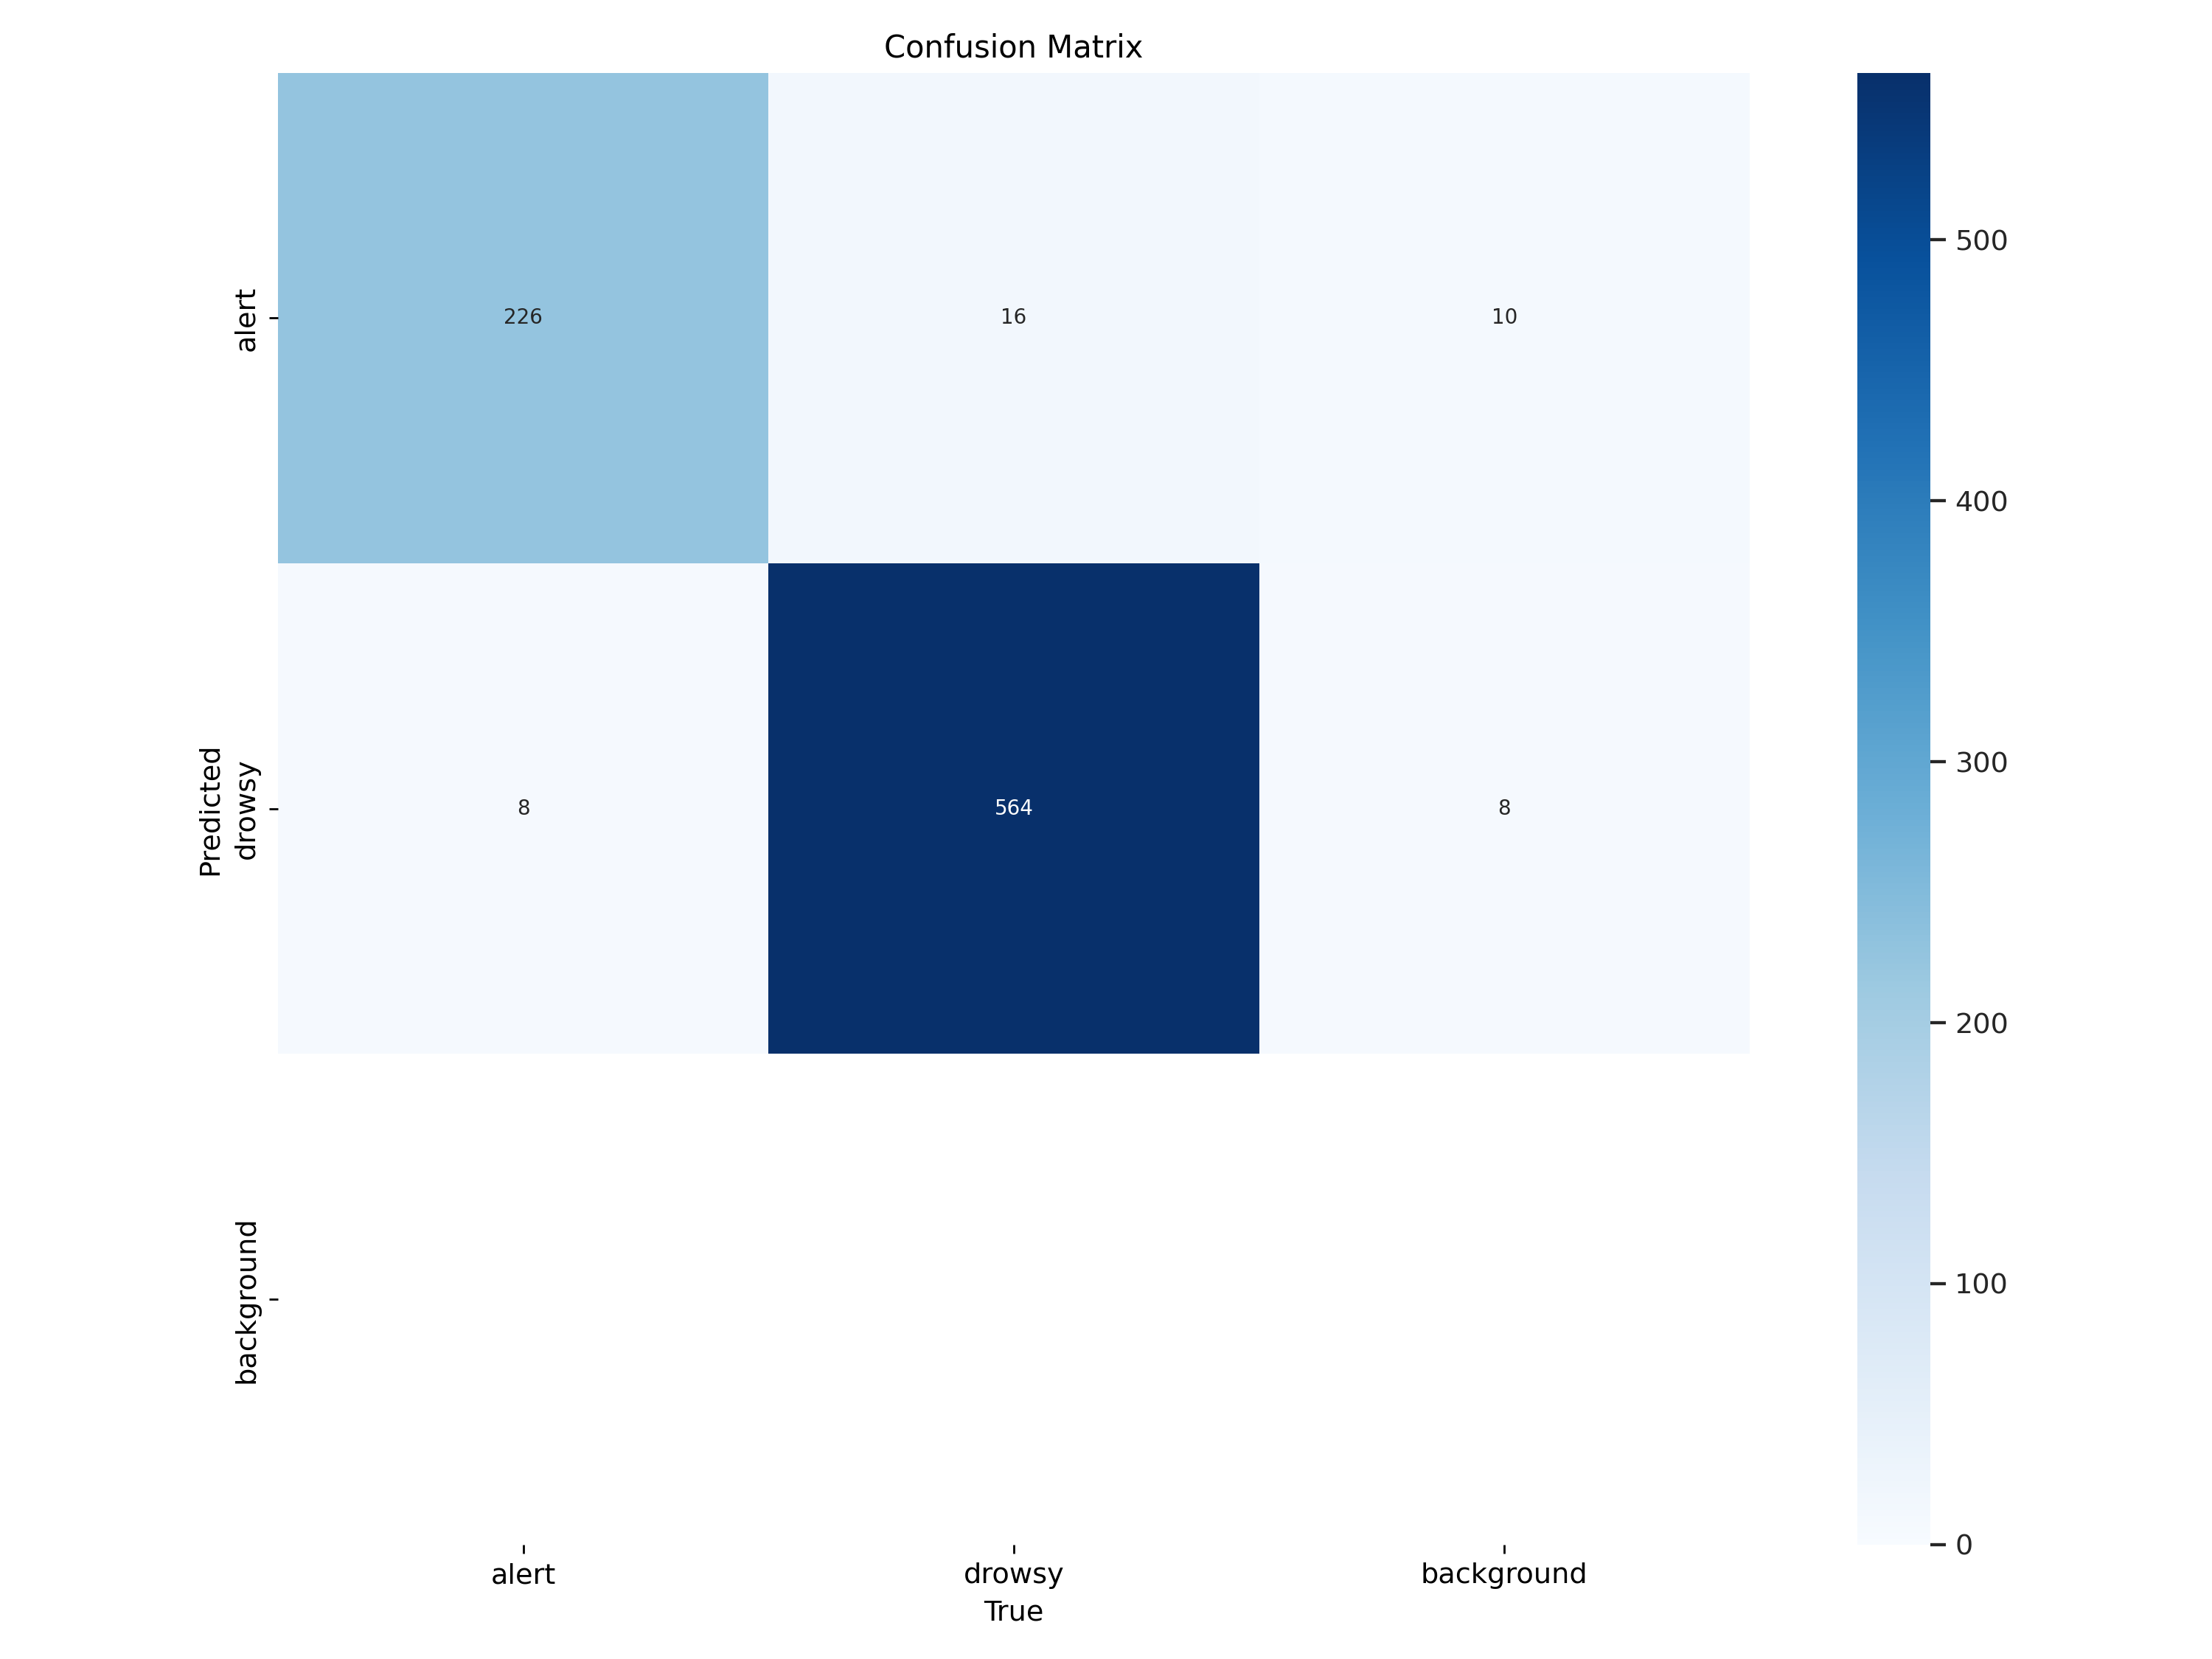

In [19]:
from IPython.display import Image

# Display confusion matrix (change path accordingly)
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=600)

/home/abdulla.almarzooqi/Desktop/AI702Project


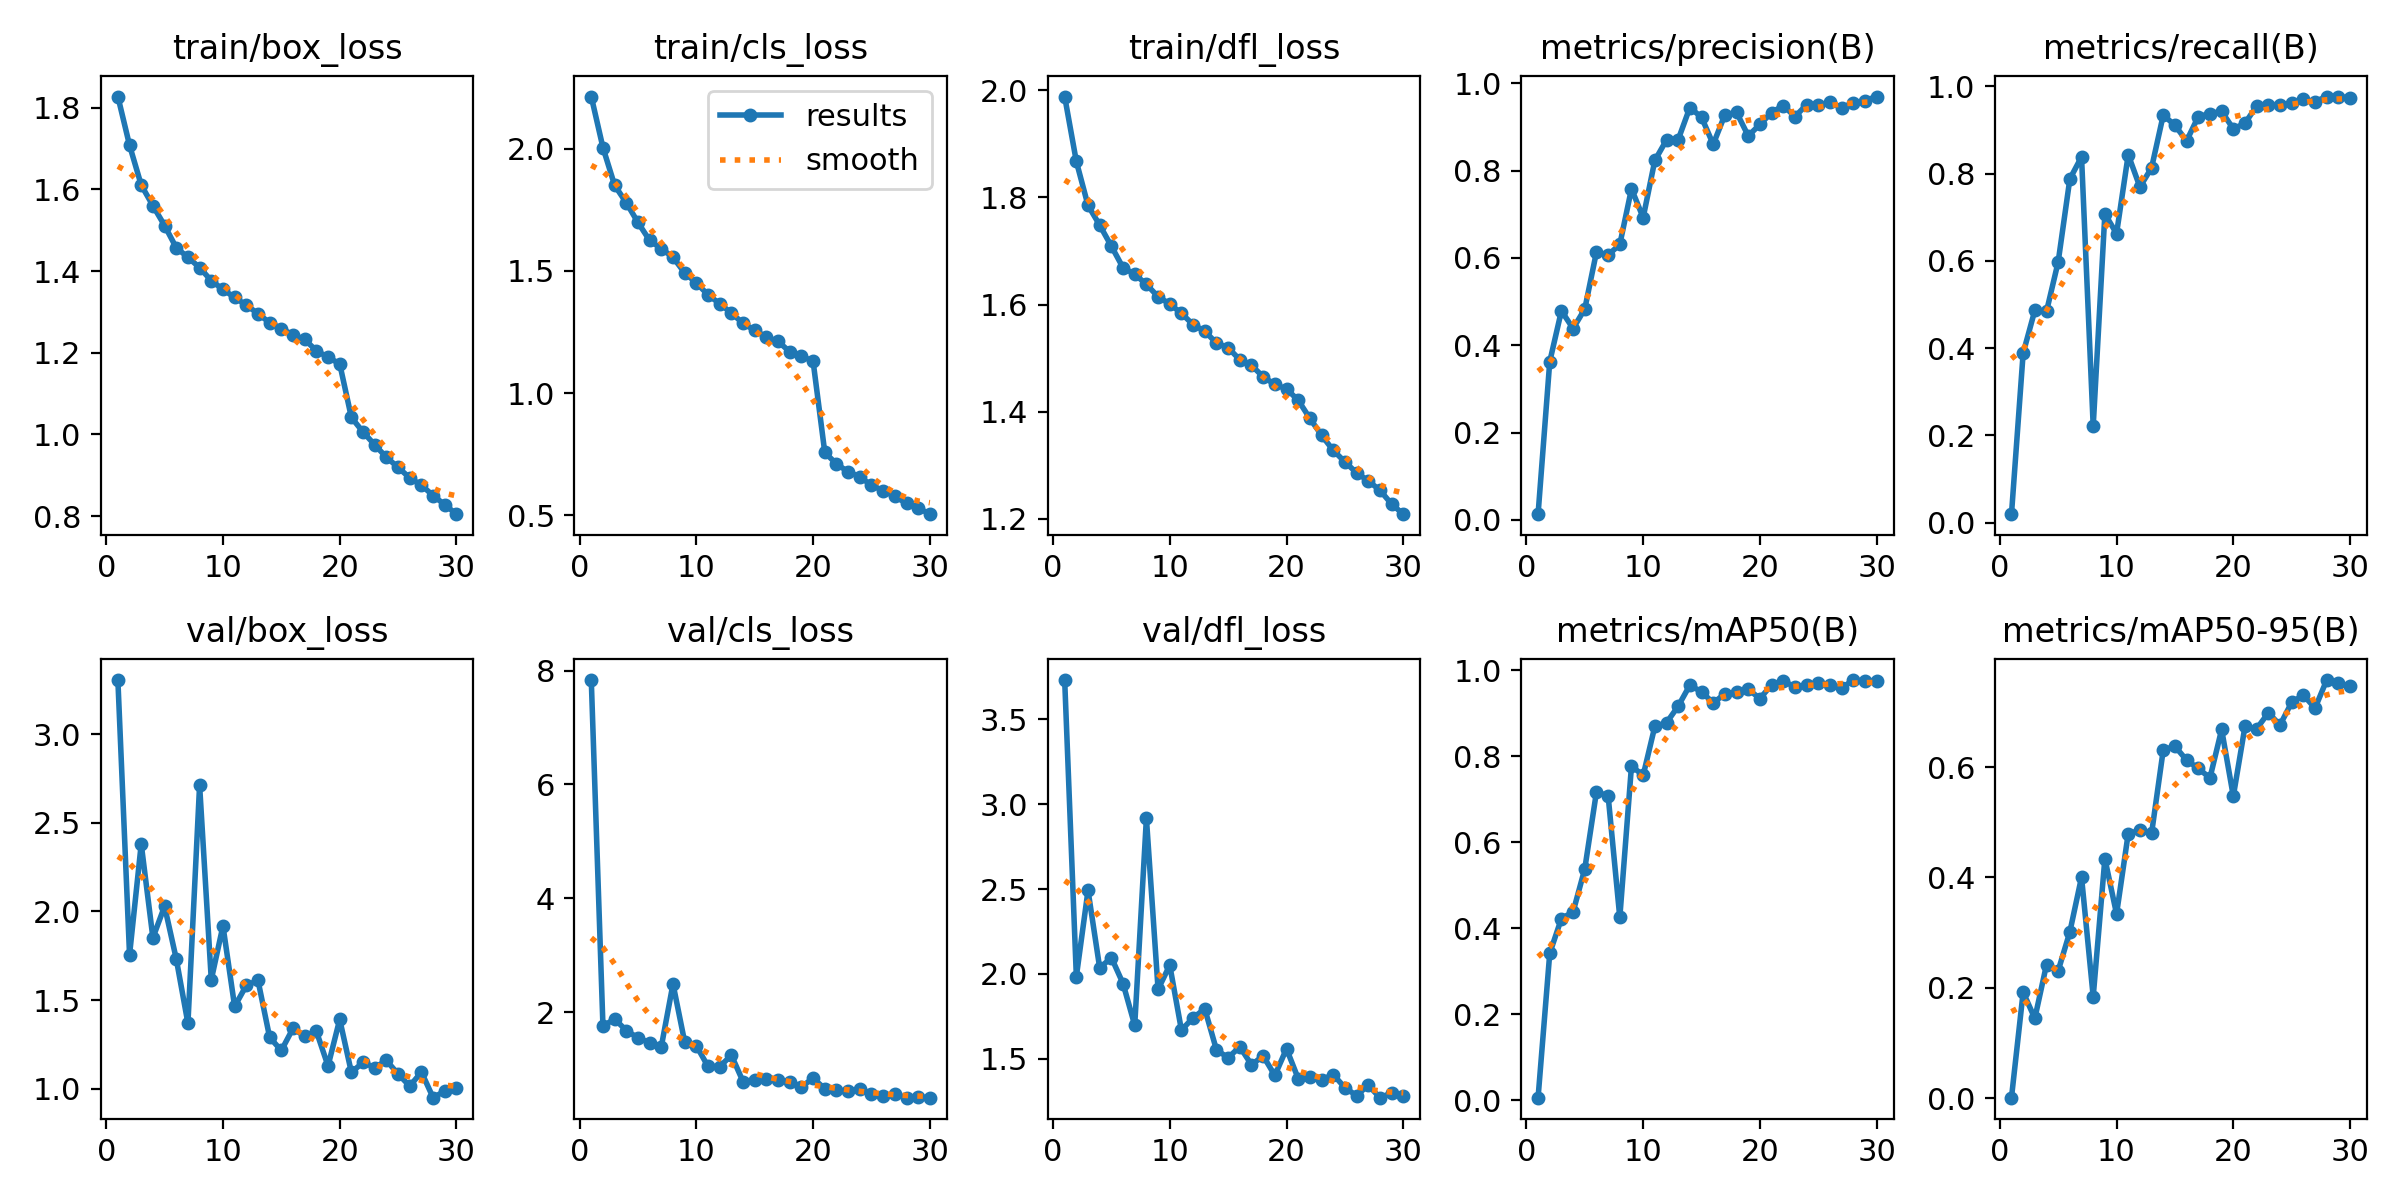

In [20]:
# Display plots (change path accordingly)
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=600)

In [22]:
# (change path accordingly)
model = YOLO(f'{HOME}/runs/detect/train7/weights/best.pt')

# Display metrics
results = model.val(
    data=new_yaml_file,
    save=True
)

Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/valid/labels.cache... 814 images, 0 backgrounds, 0 corrupt: 100%|██████████| 814/814 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:03<00:00, 14.95it/s]


                   all        814        814      0.959      0.969       0.98      0.742
                 alert        814        234      0.942      0.965       0.97      0.728
                drowsy        814        580      0.976      0.974      0.991      0.756
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val2


In [6]:
# Predict test images

results = model.predict(
    data=new_yaml_file,
    conf=0.25,
    iou=0.45,
    source=test_images_path,
    save=True
)


image 1/482 /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/test/images/100_jpg.rf.6a0d7bb927a1415b56244b85659737aa.jpg: 480x480 1 drowsy, 9.6ms
image 2/482 /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/test/images/102_jpg.rf.199ea73832422606f6fb641c0defabec.jpg: 480x480 1 drowsy, 9.8ms
image 3/482 /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/test/images/104_jpg.rf.59a14a0746ad500c90087f0d769ea0f7.jpg: 480x480 1 drowsy, 9.8ms
image 4/482 /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/test/images/111_jpg.rf.4971ee203e16140f81fe387c7b84e166.jpg: 480x480 1 alert, 1 drowsy, 9.7ms
image 5/482 /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/test/images/156_jpg.rf.6bb2d45efb9fa41988322306d02370ac.jpg: 480x480 1 drowsy, 9.6ms
image 6/482 /home/abdulla.almarzooqi/Desktop/AI702Project/Drowsiness-/-Fatigue_Detection-4/test/images/174_jpg

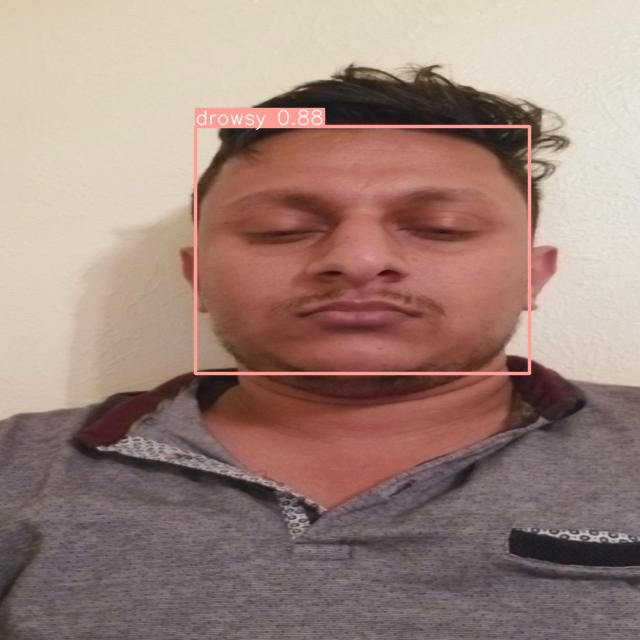

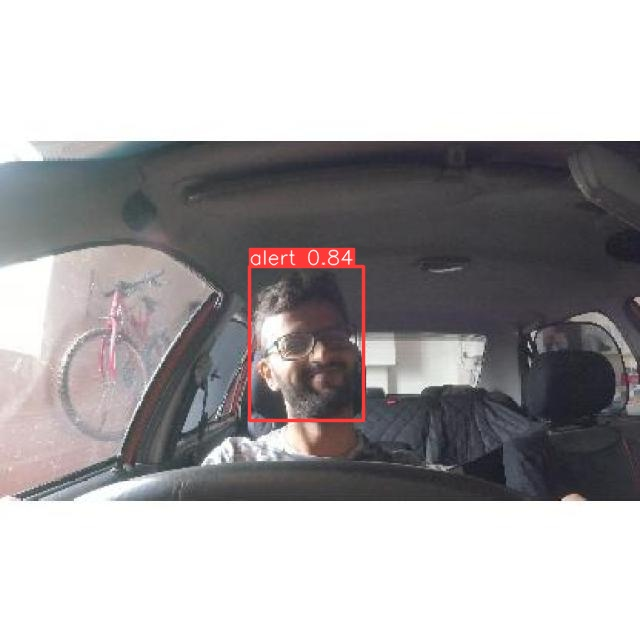

In [21]:
import glob
from IPython.display import display

# Display some predicted images (change path accordingly)
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[30:32]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [25]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-1.13.1 CPU (AMD Ryzen Threadripper PRO 3955WX 16-Cores)

PyTorch: starting from '/home/abdulla.almarzooqi/Desktop/AI702Project/runs/detect/train7/weights/best.pt' with input shape (1, 3, 480, 480) BCHW and output shape(s) (1, 6, 4725) (49.6 MB)

ONNX: starting export with onnx 1.15.0 opset 16...
ONNX: export success ✅ 4.7s, saved as '/home/abdulla.almarzooqi/Desktop/AI702Project/runs/detect/train7/weights/best.onnx' (98.7 MB)

Export complete (7.7s)
Results saved to /home/abdulla.almarzooqi/Desktop/AI702Project/runs/detect/train7/weights
Predict:         yolo predict task=detect model=/home/abdulla.almarzooqi/Desktop/AI702Project/runs/detect/train7/weights/best.onnx imgsz=480  
Validate:        yolo val task=detect model=/home/abdulla.almarzooqi/Desktop/AI702Project/runs/detect/train7/weights/best.onnx imgsz=480 data=/home/abdulla.almarzooqi/Desktop/AI702Project/custom_data.yaml  
Visualize:       https://netron.app


'/home/abdulla.almarzooqi/Desktop/AI702Project/runs/detect/train7/weights/best.onnx'